In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

In [2]:
df = pd.read_csv(r"D:\SQL\csv_files_python\2_top_paying_jobs_skills.csv")

In [3]:
df

,job_id,job_title,salary_year_avg,company_name,skills
0,552322,Associate Director- Data Insights,255829.5,AT&T,sql
1,552322,Associate Director- Data Insights,255829.5,AT&T,python
2,552322,Associate Director- Data Insights,255829.5,AT&T,r
3,552322,Associate Director- Data Insights,255829.5,AT&T,azure
4,552322,Associate Director- Data Insights,255829.5,AT&T,databricks
...,...,...,...,...,...
61,1749593,Principal Data Analyst,186000.0,SmartAsset,tableau
62,1749593,Principal Data Analyst,186000.0,SmartAsset,gitlab
63,387860,ERM Data Analyst,184000.0,Get It Recruit - Information Technology,sql
64,387860,ERM Data Analyst,184000.0,Get It Recruit - Information Technology,python


In [4]:
df_skills = df[["salary_year_avg", "skills"]].copy()

In [5]:
df_skills

,salary_year_avg,skills
0,255829.5,sql
1,255829.5,python
2,255829.5,r
3,255829.5,azure
4,255829.5,databricks
...,...,...
61,186000.0,tableau
62,186000.0,gitlab
63,184000.0,sql
64,184000.0,python


In [6]:
job_skills = df_skills.groupby("skills").agg(
    salary_median=("salary_year_avg", "median"),
    skill_count=("skills", "size")
).sort_values(by=["skill_count", "salary_median"], ascending=[False, False])

job_skills

,salary_median,skill_count
skills,,
sql,197154.50,8
python,189309.00,7
tableau,211000.00,6
r,210711.50,4
excel,205000.00,3
pandas,205000.00,3
snowflake,189309.00,3
aws,222569.25,2
azure,222569.25,2


In [7]:
job_skills = job_skills.head(10)

In [8]:
job_skills

,salary_median,skill_count
skills,,
sql,197154.50,8
python,189309.00,7
tableau,211000.00,6
r,210711.50,4
excel,205000.00,3
pandas,205000.00,3
snowflake,189309.00,3
aws,222569.25,2
azure,222569.25,2


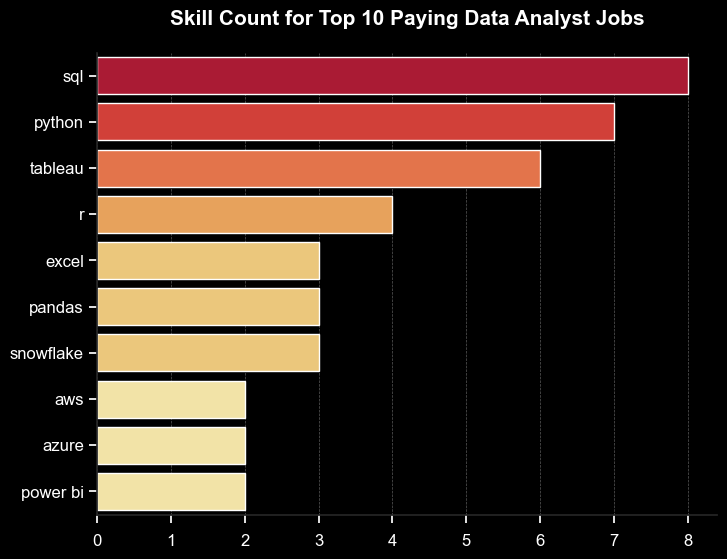

In [9]:
plt.figure(figsize=(8, 6), facecolor="black")

palette = sns.color_palette("YlOrRd", n_colors=6)

sns.set_theme(style="ticks")
sns.barplot(data=job_skills, x="skill_count", y="skills", hue="skill_count", palette=palette, legend=False)
sns.despine()

ax = plt.gca()  
ax.set_facecolor("black")  

plt.grid(axis="x", color="gray", linestyle="--", linewidth=0.5, alpha=0.7, zorder=0)
plt.title("Skill Count for Top 10 Paying Data Analyst Jobs", color='white', fontsize=15, fontweight='bold', pad=20)  
plt.ylabel("")  
plt.xlabel("")  

ax.tick_params(axis='x', colors='white', labelsize=12)  
ax.tick_params(axis='y', colors='white', labelsize=12)  
ax.xaxis.set_tick_params(pad=8)

plt.show()